In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Py transition

In [113]:
def randfield(nx,ny,cutoff):
    
    # return a smooth, randomly varying field between zero and 1. As cutoff
    # increases, the structure of the field becomes smaller wavelength. 
    f = np.fft.fftshift(np.fft.fft2(np.random.rand(ny,nx)))
    [Nx,Ny] = np.meshgrid(range(0,nx),range(0,ny))
    f[np.sqrt((Nx-nx/2)**2+(Ny-ny/2)**2)>cutoff]=0
    f = np.real(np.fft.ifft2(np.fft.ifftshift(f)))
    f = f-np.amin(f)
    f = f/np.amax(f)
    
    return f

In [114]:
## Assign simulation params
Dc = 1 # cost of decentralized utility per unit
Cc = 1 # cost of decentralized utility per unit

## initial conditions

N = 256
D = randfield(N,N,5) # demand of utility per pixel (this variable lies on the VERTICES of the graph)
P = randfield(N,N,5) # centralized power output per pixel (should be zero for most pixels) (this variable lies on the VERTICES of the graph)
development_cost_x = randfield(N-1,N,5) # cost to lay utility transmission lines in the horizontal direction (this variable lies on the EDGES of the graph)
development_cost_y = randfield(N,N-1,5) # cost to lay utility transmission lines in the vertical direction (this variable lies on the EDGES of the graph)
capacity_x = np.zeros((N-1,N)) # transmission line capacity in the horizontal direction (this variable lies on the EDGES of the graph)
capacity_y = np.zeros((N,N-1)) # transmission line capacity in the vertical direction (this variable lies on the EDGES of the graph)

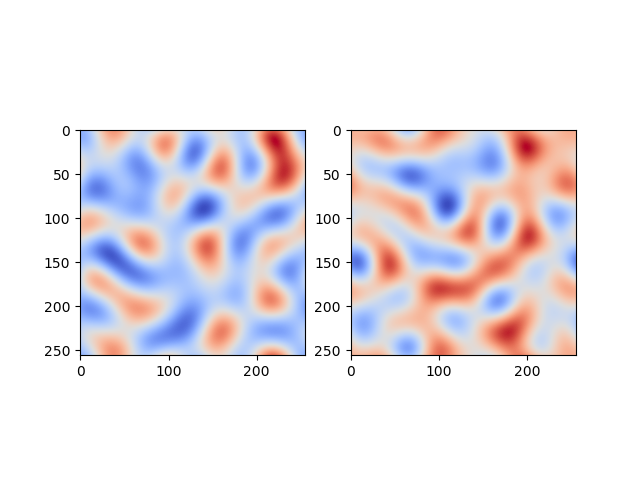

In [116]:
# plot the randomly genderated Demand and PowerGen grids
plt.subplot(121)
plt.imshow(P,cmap=cm.coolwarm)
plt.subplot(122)
plt.imshow(D,cmap=cm.coolwarm)
plt.show()